# Import library 

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import os
import cv2
import math
import glob
import h5py

# Preprocessing

In [62]:
# Preprocessing for test

folders = glob.glob('Test/*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

In [63]:
for image in imagenames_list:
  Preimage = Image.open(image).convert('L')
  new_image = Preimage.resize((150, 130))
  new_image.save(image)

In [64]:
# Preprocessing for trainig 

folders = glob.glob('Train/*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

In [65]:
for image in imagenames_list:
  Preimage = Image.open(image).convert('L')
  new_image = Preimage.resize((150, 130))
  new_image.save(image)

# Load data and Create label

In [66]:
# Load train data

folderName = []
train = []
dataPath = "C:/Users/selle/Downloads/temple recognition/Test"

IMG_WIDTH = 150
IMG_HEIGHT = 130

for i in range(1, 4):
    folderName.append(str(i))
    i+=1
    
def createData():
    for folder in folderName:
        path = os.path.join(dataPath, folder)
        class_num = folderName.index(folder)
        for image in os.listdir(path):
            imageArray = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            newArray = cv2.resize(imageArray, (IMG_WIDTH, IMG_HEIGHT))
            train.append([newArray, class_num])
            
createData()

In [67]:
# Load test data

folderName = []
test = []
dataPath = "C:/Users/selle/Downloads/temple recognition/Train"

IMG_WIDTH = 150
IMG_HEIGHT = 130

for i in range(1, 4):
    folderName.append(str(i))
    i+=1
    
def createData():
    for folder in folderName:
        path = os.path.join(dataPath, folder)
        class_num = folderName.index(folder)
        for image in os.listdir(path):
            imageArray = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            newArray = cv2.resize(imageArray, (IMG_WIDTH, IMG_HEIGHT))
            test.append([newArray, class_num])
            
createData()

In [68]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for features, label in train:
    X_train.append(features)
    Y_train.append(label)
    
for features, label in test:
    X_test.append(features)
    Y_test.append(label)

In [69]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [70]:
# Reshape the numpy array 

X_train = X_train.reshape(X_train.shape[0], 19500)
X_test = X_test.reshape(X_test.shape[0], 19500)

In [71]:
# Normalize to 0-1

X_train = X_train/255
X_test = X_test/255

In [72]:
# Display the shape

print("Total dataset size:")

print("X_train shape: {0}".format(X_train.shape))
print("X_test shape: {0}".format(X_test.shape))

print("Y_train size: {0}".format(len(Y_train)))
print("Y_test size: {0}".format(len(Y_test)))

Total dataset size:
X_train shape: (45, 19500)
X_test shape: (45, 19500)
Y_train size: 45
Y_test size: 45


In [73]:
print(X_train)

[[0.79607843 0.79607843 0.79607843 ... 0.30980392 0.30588235 0.30980392]
 [0.36470588 0.37254902 0.36078431 ... 0.21960784 0.21568627 0.28627451]
 [0.85098039 0.8627451  0.88627451 ... 0.34509804 0.4        0.40392157]
 ...
 [0.03921569 0.03921569 0.03921569 ... 0.56862745 0.4        0.27058824]
 [0.03137255 0.03137255 0.03137255 ... 0.0627451  0.07058824 0.06666667]
 [0.01568627 0.01568627 0.01568627 ... 0.15294118 0.14901961 0.28627451]]


In [74]:
print(X_test)

[[0.88627451 0.88235294 0.88627451 ... 0.23529412 0.25490196 0.15686275]
 [0.76862745 0.77254902 0.77254902 ... 0.55294118 0.63921569 0.59607843]
 [0.77647059 0.77647059 0.77647059 ... 0.79215686 0.81960784 0.76470588]
 ...
 [0.63529412 0.63529412 0.63529412 ... 0.46666667 0.50980392 0.48627451]
 [0.9254902  0.92941176 0.93333333 ... 0.3372549  0.44705882 0.23921569]
 [0.81960784 0.82352941 0.83137255 ... 0.17647059 0.17254902 0.16470588]]


In [75]:
print(Y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [76]:
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [77]:
# #store train data to h5py
hf = h5py.File('xtrain.h5', 'w')
hf.create_dataset('X_train',data=X_train)

Exception ignored in: <function PhotoImage.__del__ at 0x000001D8081D19E0>
Traceback (most recent call last):
  File "C:\Users\selle\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\ImageTk.py", line 132, in __del__
    name = self.__photo.name
           ^^^^^^^^^^^^
AttributeError: 'PhotoImage' object has no attribute '_PhotoImage__photo'


OSError: Unable to create file (unable to truncate a file which is already open)

In [78]:
#store test data to h5py
hf = h5py.File('xtest.h5', 'w')
hf.create_dataset('X_test',data=X_test)

OSError: Unable to create file (unable to truncate a file which is already open)

In [79]:
#Load h5py file
h5_train = h5py.File('xtrain.h5','r+')
h5_test = h5py.File('xtest.h5','r+')


In [80]:
X_train = np.array(h5_train["/X_train"])
X_test = np.array(h5_test["/X_test"])
print(X_train.shape)
print(X_test.shape)

(45, 19500)
(45, 19500)


# **Put x and y in a pandas dataframe**

In [81]:
import pandas as pd

df = pd.DataFrame(np.c_[X_train, Y_train])

In [82]:
df.head()

0         1         2         3         4         5         6      \
0  0.886275  0.882353  0.886275  0.894118  0.898039  0.898039  0.905882   
1  0.768627  0.772549  0.772549  0.776471  0.776471  0.772549  0.772549   
2  0.776471  0.776471  0.776471  0.780392  0.780392  0.780392  0.780392   
3  0.882353  0.894118  0.886275  0.890196  0.901961  0.913725  0.933333   
4  0.886275  0.886275  0.886275  0.886275  0.882353  0.878431  0.878431   

      7         8         9      ...     19491     19492     19493     19494  \
0  0.905882  0.913725  0.901961  ...  0.109804  0.121569  0.019608  0.156863   
1  0.772549  0.776471  0.776471  ...  0.372549  0.376471  0.364706  0.329412   
2  0.780392  0.780392  0.780392  ...  0.698039  0.725490  0.756863  0.780392   
3  0.937255  0.933333  0.937255  ...  0.419608  0.407843  0.411765  0.400000   
4  0.874510  0.874510  0.874510  ...  0.309804  0.345098  0.337255  0.376471   

      19495     19496     19497     19498     19499  19500  
0  0.203922  0.184314  0.235294  0.254902  0.156863    0.0  
1  0.329412  0.431373  0.552941  0.639216  0.596078    0.0  
2  0.772549  0.780392  0.792157  0.819608  0.764706    0.0  
3  0.435294  0.419608  0.411765  0.388235  0.392157    0.0  
4  0.364706  0.313725  0.341176  0.313725  0.341176    0.0  

[5 rows x 19501 columns]

# PCA

In [83]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [84]:
H = 130
W = 150

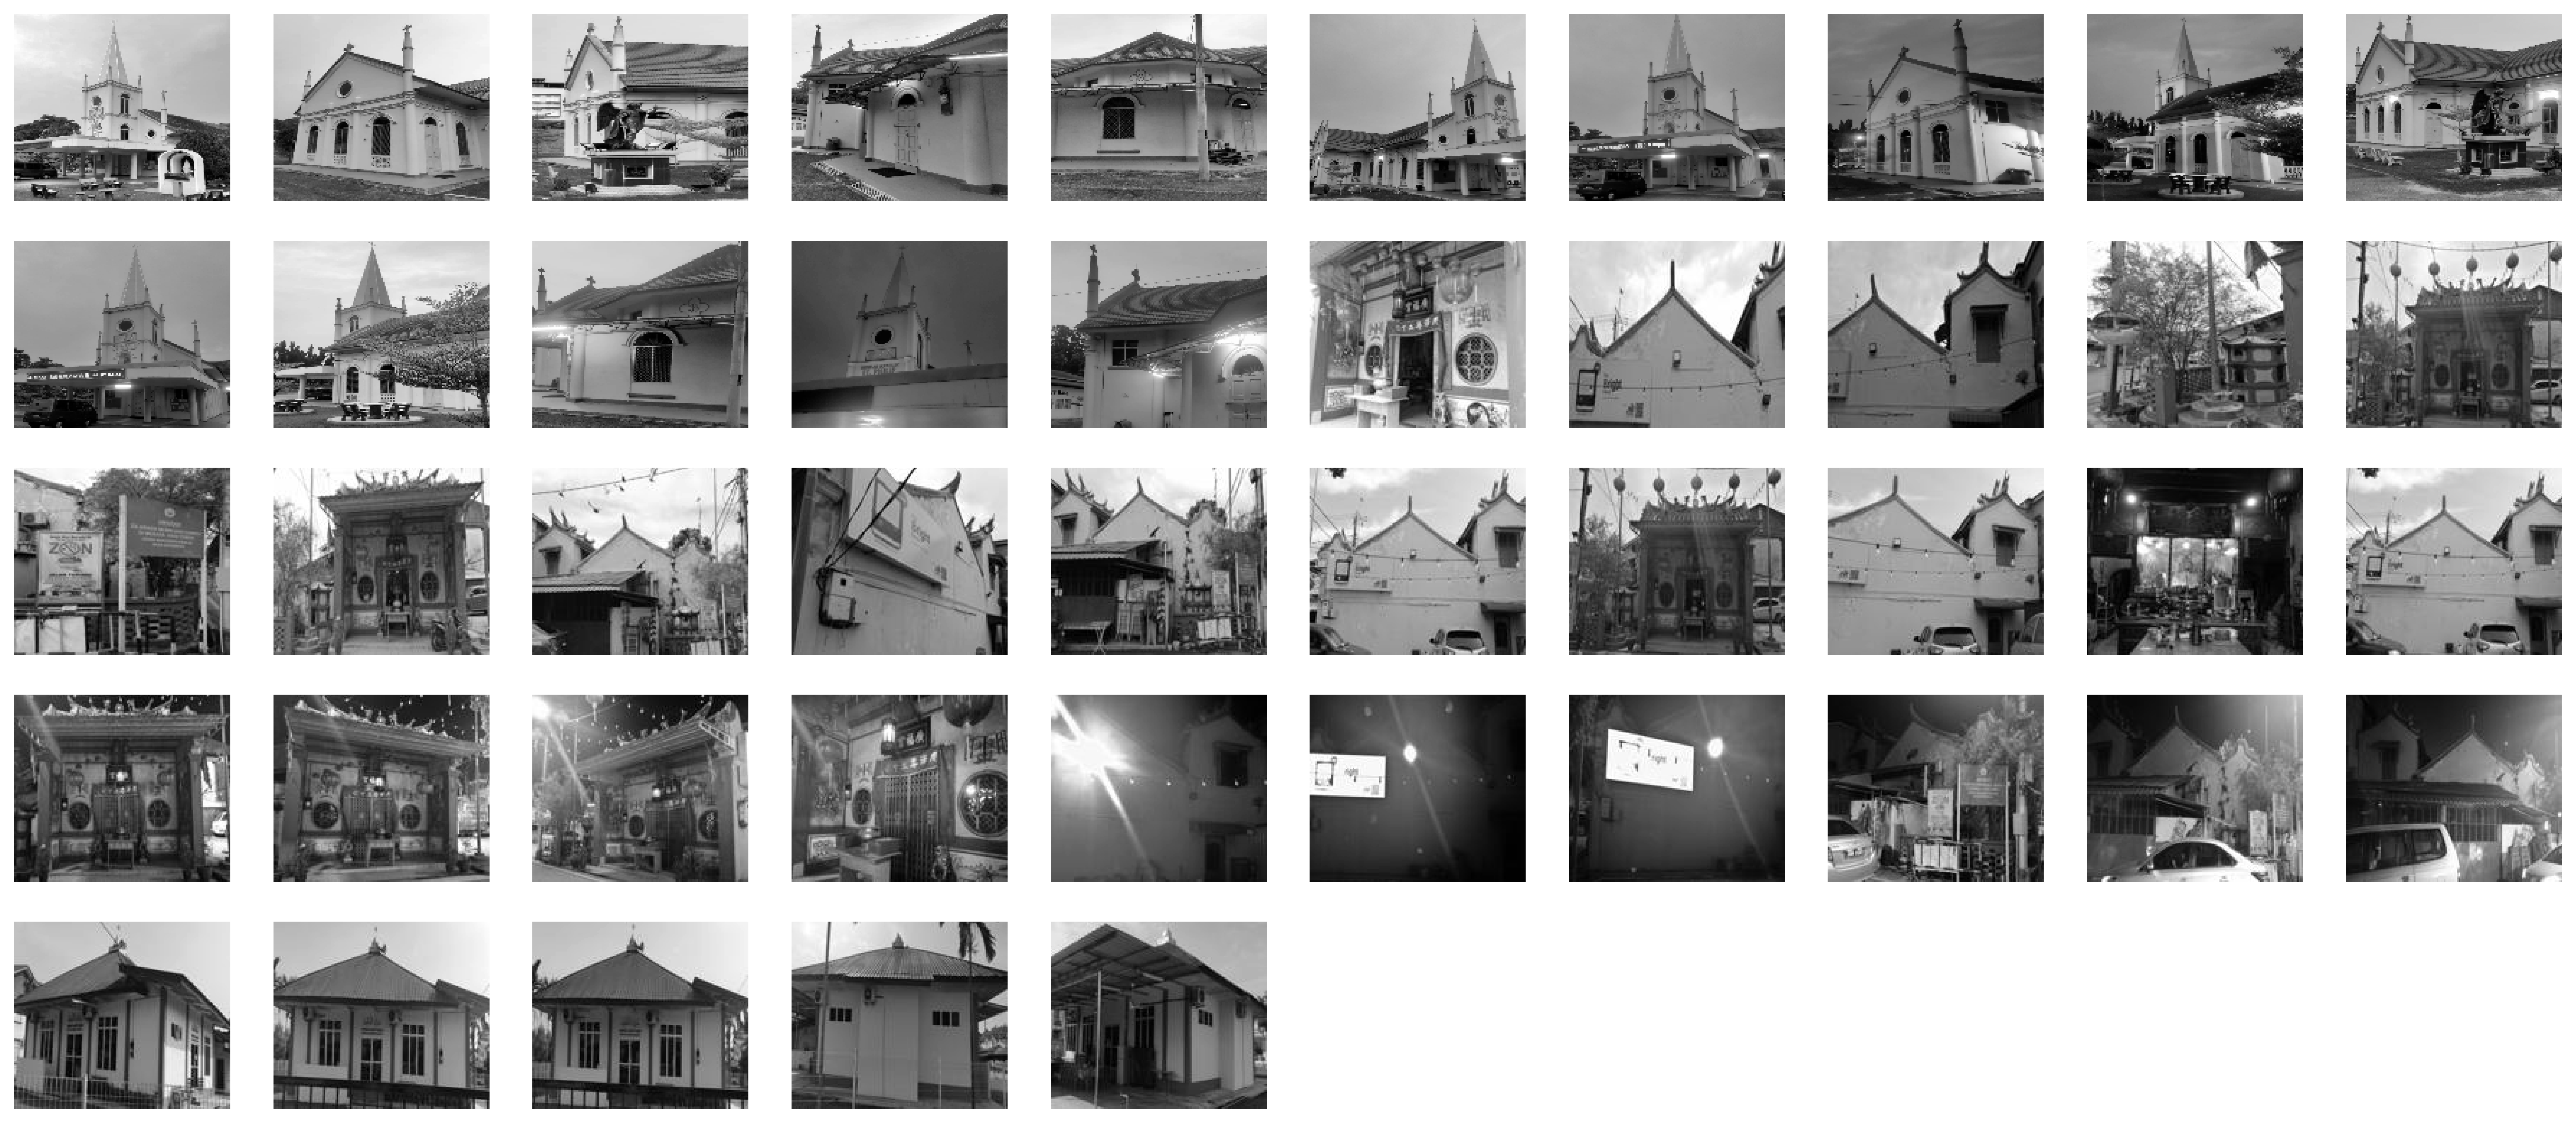

In [85]:
# Show training images
image_grid(X_train, H, W)
plt.show()

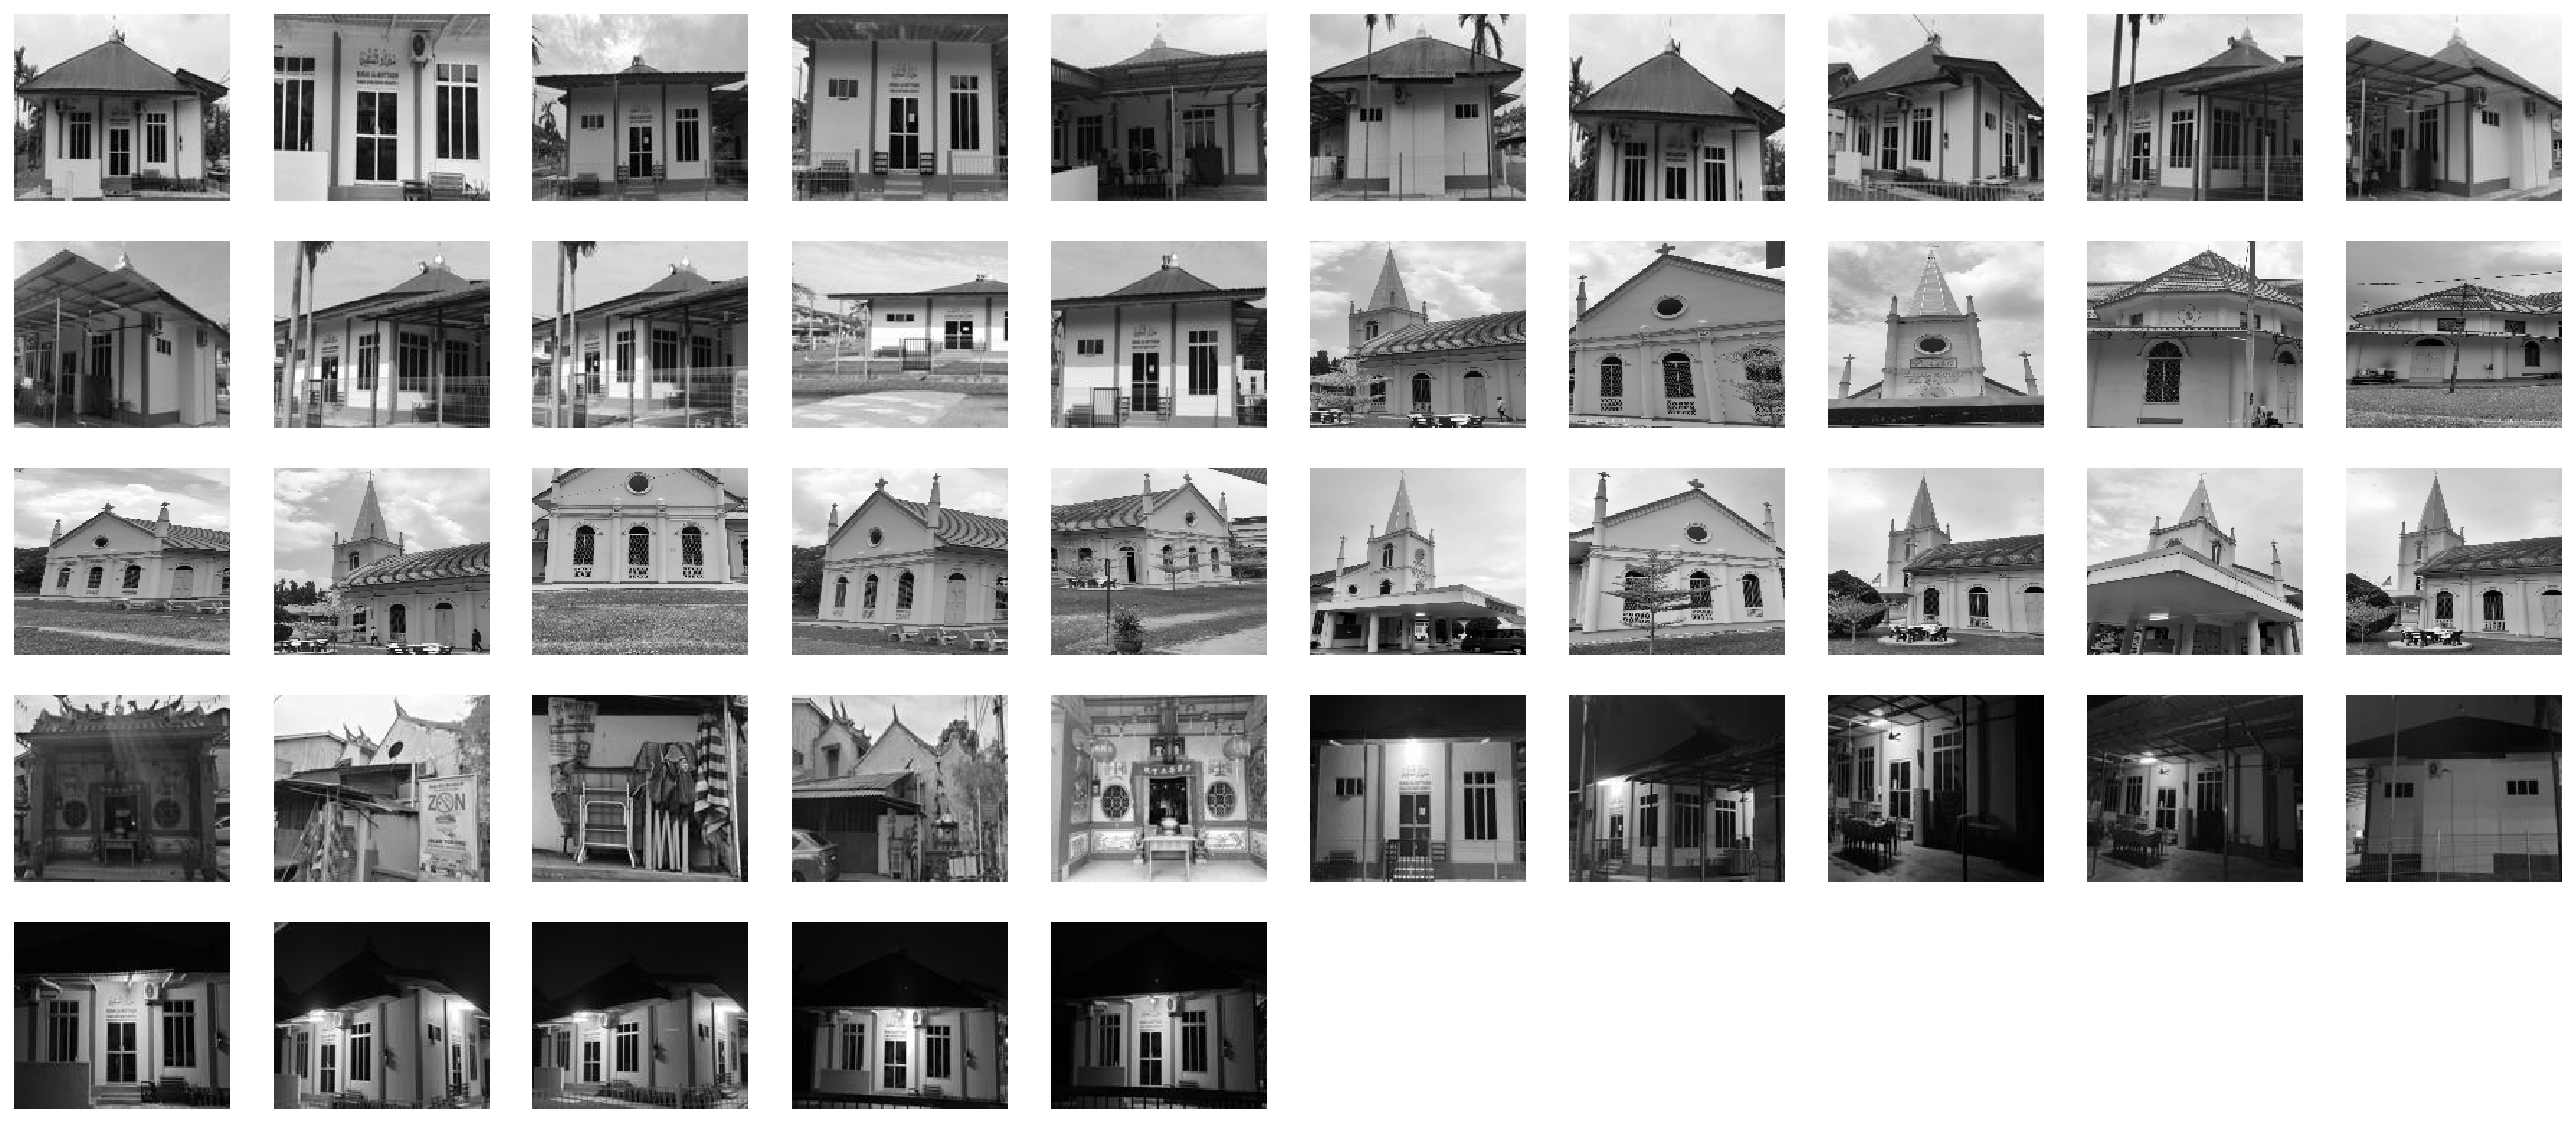

In [86]:
# Show testing images
image_grid(X_test,H,W)
plt.show()

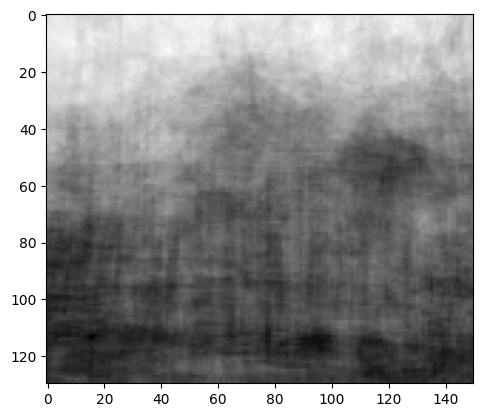

In [87]:
# Find the mean image
mean_image = np.mean(X_train, axis=0)

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.show()

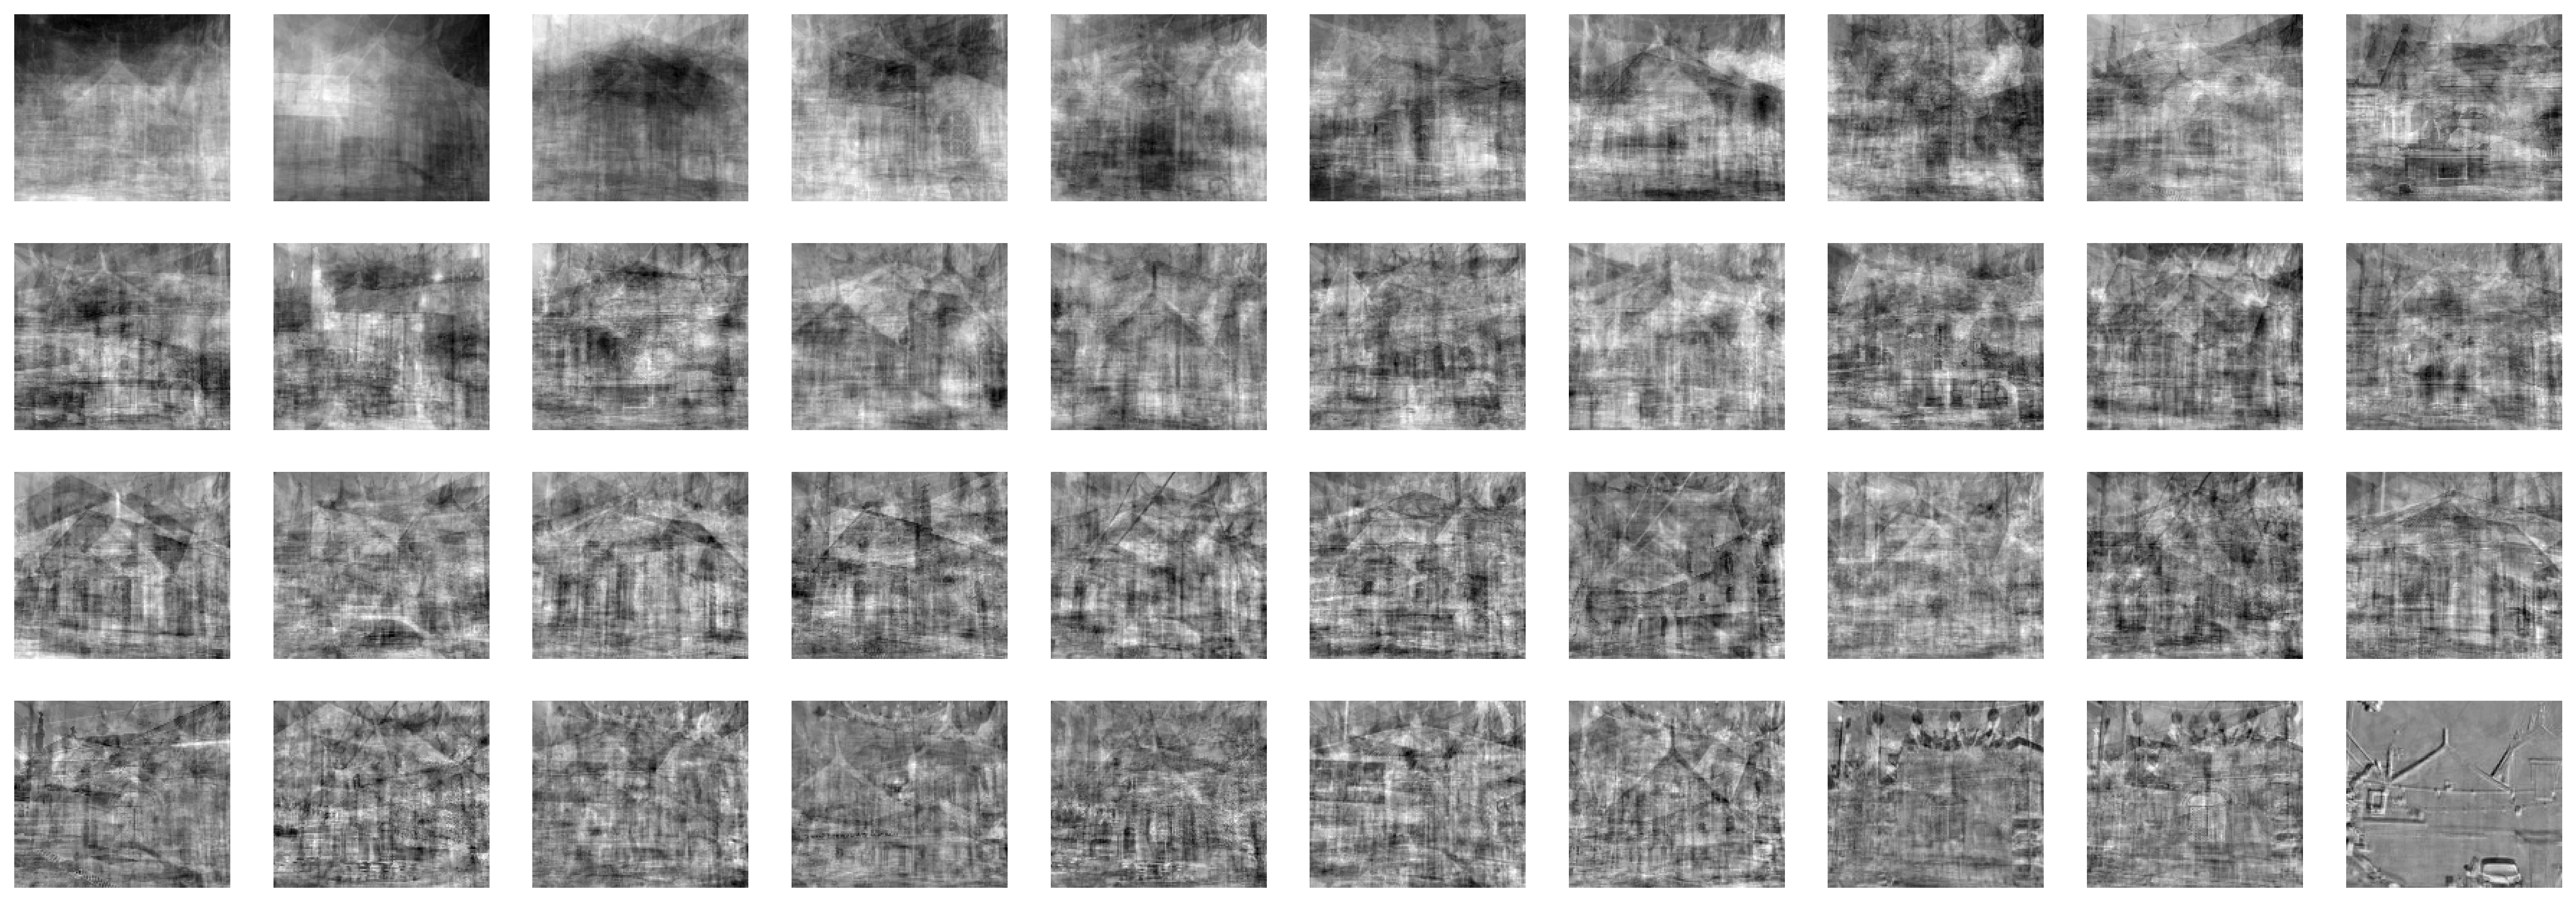

In [88]:
from sklearn.decomposition import PCA
n_components = 40

# Extracting the top 40 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [89]:
def featureExtraction(train, test, n):
    pca = PCA(n_components = n)
    pca.fit(train)
    X_pca_train = pca.transform(train)
    X_pca_test = pca.transform(test)
    return X_pca_train, X_pca_test
    
X_pca_train, X_pca_test = featureExtraction(X_train, X_test, 40)

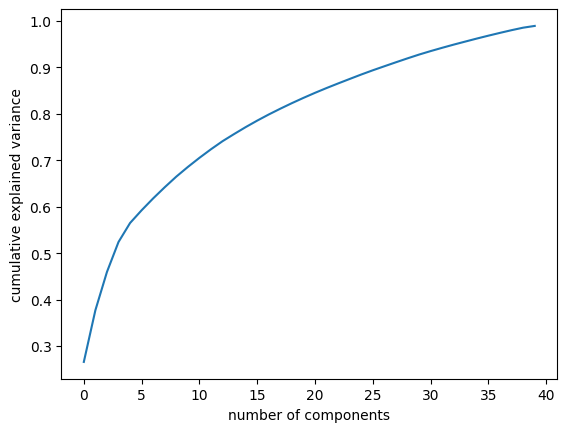

In [90]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [91]:
# Calculate distances

intra_class_dist = np.sum(np.power((X_pca_train[1,:] - X_pca_test[1,:]),2))
inter_class_dist = np.sum(np.power((X_pca_train[1,:] - X_pca_test[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))

Intra-class distance: 1800
Inter-class distance: 1076


# SVM/SVC

In [92]:
clf = SVC(kernel='rbf', class_weight='balanced', gamma=0.001, C=100)
clf_trained = clf.fit(X_pca_train, Y_train)

In [93]:
pred = clf.predict(X_pca_test)

In [94]:
print("Model parameters:")
clf_trained.get_params()

Model parameters:


{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [95]:
accuracy_score(Y_test, pred)

0.13333333333333333

In [96]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
a_score = metrics.accuracy_score(Y_test, pred)
print("Accuracy:", a_score)

Accuracy: 0.13333333333333333


In [55]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.14      0.27      0.18        15
           1       0.00      0.00      0.00        15
           2       0.29      0.13      0.18        15

    accuracy                           0.13        45
   macro avg       0.14      0.13      0.12        45
weighted avg       0.14      0.13      0.12        45



# Confusion Matrix

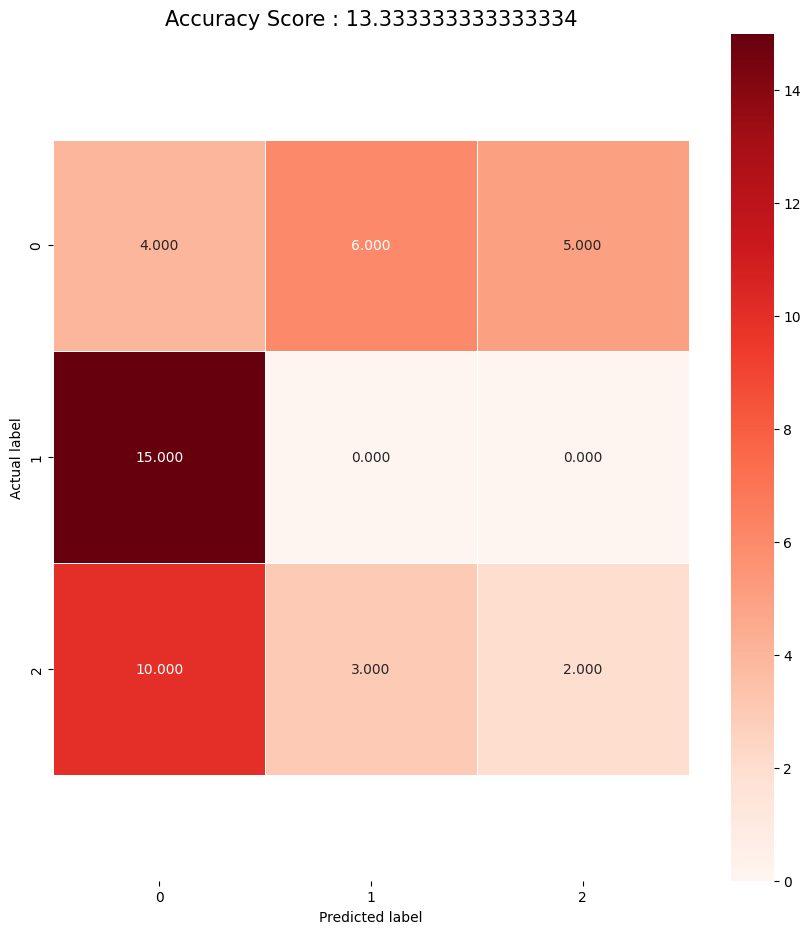

In [56]:
mat = confusion_matrix(Y_test,pred)
accurancy = accuracy_score(Y_test,pred)

plt.figure(figsize=(11,11))
ax = sns.heatmap(mat[0:10,0:10], annot=True, fmt=".3f", linewidths=.5, 
                 square=True,cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(accurancy*100)
plt.title(all_sample_title, size=15)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [57]:
print("Actual     Predicted ")
for p in range(len(Y_test)):
  if Y_test[p] != pred[p]:
    print(Y_test[p], "      ", pred[p])

Actual     Predicted 
0        2
0        2
0        1
0        1
0        2
0        1
0        2
0        2
0        1
0        1
0        1
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
2        0
2        1
2        0
2        1
2        0
2        0
2        0
2        0
2        0
2        0
2        0
2        0
2        1


# GUI

In [60]:
# Import libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image
from PIL import ImageTk
import numpy as np
import pickle



classes = {
    0: 'Church',
    1: 'Hindu Temple',
    2: 'Mosque',
    3: 'Mosque 2'
}

# Browse image 
def upload_image():
    file_path = filedialog.askopenfilename()
    uploaded = Image.open(file_path)
    uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
    im = ImageTk.PhotoImage(uploaded)
    sign_image.configure(image=im)
    sign_image.image = im
    show_predict_button(file_path)
   


# predict button
def show_predict_button(file_path):
    predict_btn = Button(top, text="Predict Image", command = lambda: classify(file_path), padx=20, pady=10)
    predict_btn.configure(background ="#000080", foreground="white",font=('arial',10,'bold'))
    predict_btn.place(relx=0.60, rely=0.83)
    

def classify(file_path):
    image = Image.open(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (150, 130))
    image = np.array(image)
    image = image.reshape(1,19500)
    image = image/255
    pca = PCA(n_components=40)
    pca.fit(X_train)
    image = pca.transform(image)
    pred = clf.predict(image)[0]
    sign = classes[pred]
    XO = "wrong"
    color = 'red'
    if pred == 0 and ("1_c" in file_path) == True:
        XO ="correct"
        color="green"
    elif pred == 1 and ("2_h" in file_path) == True:
        XO ="correct"
        color ='green'
    elif pred == 2 and ("3_m" in file_path) == True:
        XO ="correct"
        color='green'
    elif pred == 3 and ("4_m2" in file_path) == True:
        XO ="corret"
        color='green'
    resulting(sign,XO,color)

# Display result
def resulting(sign,XO,color):
    heading2.configure(background = "#cce6ff", foreground = "black",text="Predict result is "+sign,font=('Georgia',16,'bold'))
    heading2.pack()
    heading3.configure(background = "#cce6ff", foreground = color,text="The result is "+XO,font=('Georgia',14,'bold'))
    heading3.pack()
    

# Initialize 
top = tk.Tk()
top.geometry("550x500")
top.resizable(False,False)
top.title("Temple Recognition System(SVM)")
#top.iconbitmap("logo.ico")
top.configure(bg = "#cce6ff")

# Set heading
heading = Label(top,text="Temple Recognition System",pady=20, font=('Papyrus',20,'bold'))
heading.configure(background = "#cce6ff", foreground = "#364156")
heading.pack()

# Result heading
heading2 = Label(top,text="",pady=10, font=('Arial',12,'bold'))
heading2.configure(background = "#cce6ff", foreground = "#364156")
heading2.pack()

heading3 = Label(top,text="",pady=10, font=('Arial',12,'bold'))
heading3.configure(background = "#cce6ff", foreground = "#364156")
heading3.pack()

# Browse Button
upload = Button(top, text ="Browse Image", command= upload_image, padx=20, pady=10)
upload.configure(background ="#000080", foreground = 'white', font =('arial', 10 ,'bold'))
upload.place(relx=0.10, rely=0.83)


# Uploaded
sign_image = Label(top)
sign_image.configure(bg="#cce6ff")
sign_image.pack(side =BOTTOM, expand = True)
sign_image.place(relx=0.5,rely=0.5, anchor='center')

top.mainloop()